<a href="https://colab.research.google.com/github/c-etulle/Vegetation-dynamics-in-the-Subandean-grasslands-of-Chubut/blob/main/10_MARAS_V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-Up

In [ ]:
import os, sys  # important for connecting files
from google.colab import drive # For connecting to the drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Used for plots in general
import seaborn as sns # used for boxplots
from scipy import stats # For calculating statistics

drive.mount('/content/drive')
%cd /content/drive/My\ Drive/ee-meinzinger-patagonia

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/ee-meinzinger-patagonia


In [ ]:
import scipy # Not required, just for getting the version
import matplotlib # Not required, just for getting the version

# Printing the versions of each package
print(f"sys version: {sys.version}")
print(f"numpy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"seaborn version: {sns.__version__}")
print(f"scipy version: {scipy.__version__}")

sys version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.8.0
seaborn version: 0.13.2
scipy version: 1.13.1


## Box plot settings

To allow the pdf files to be generated with actual text, and to streamline the boxplots.

In [ ]:

# Settings needed to export the text as actual text in pdf files
from matplotlib import rcParams

# Set to embed fonts fully
rcParams['pdf.fonttype'] = 42  # Type 42 (TrueType fonts) keeps text as text
rcParams['ps.fonttype'] = 42  # Type 42 for PostScript output as well
rcParams['font.family'] = 'DejaVu Sans'


# Customize the flierprops
flierprops = dict(marker='o', markersize=3, markerfacecolor='red', alpha=0.6, markeredgewidth=0)

# Customize the boxprops (box edges)
# Customize the line width for the box, whiskers, median, and caps
boxprops = dict(linewidth=0.5, edgecolor = "black")  # Set box edge color to black
whiskerprops = dict(linewidth=0.5, color='black')  # Set whisker line color to black
capprops = dict(linewidth=0.5, color='black')  # Set cap line color to black
medianprops = dict(linewidth=0.5, color='black')  # Set median line color to black

## Import df

The df contains all data dvs. LS, MODIS, SPEI and MARAS)

In [ ]:
# Change the working directory to the location of the .csv file
%cd /content/drive/My\ Drive/ee-meinzinger-patagonia/Data

# Load the CSV file into a pandas DataFrame
file_name = 'Merged_Data_20241005_1709.csv'
merged_data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame to confirm
merged_data.head()

/content/drive/My Drive/ee-meinzinger-patagonia/Data


,Site_Name,year_month,year,month,NDVI_Landsat,NDVI_MODIS,SPEI,Biozone,Country,Province,...,Patch_Silt,Patch_Sand,InterP_Con,InterP_pH,InterP_OC,InterP_N,InterP_OM,InterP_Clay,InterP_Silt,InterP_Sand
0,1 Rio Guenguel,2000_01,2000,1,0.04255,NaN,-1.202183,West Plateaus Shrublands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 Rio Guenguel,2000_02,2000,2,0.04015,0.14080,-0.862369,West Plateaus Shrublands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 Rio Guenguel,2000_03,2000,3,0.03890,0.13175,-0.742418,West Plateaus Shrublands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 Rio Guenguel,2000_04,2000,4,0.04640,0.14920,-0.189822,West Plateaus Shrublands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 Rio Guenguel,2000_05,2000,5,NaN,0.13650,-0.093864,West Plateaus Shrublands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Extract only SubandGr

In [ ]:
# Filter the DataFrame for "Subandean grasslands" in the "Biozone" column
subandean_grasslands = merged_data[merged_data['Biozone'] == 'Subandean grasslands']

# Display the filtered DataFrame
subandean_grasslands

,Site_Name,year_month,year,month,NDVI_Landsat,NDVI_MODIS,SPEI,Biozone,Country,Province,...,Patch_Silt,Patch_Sand,InterP_Con,InterP_pH,InterP_OC,InterP_N,InterP_OM,InterP_Clay,InterP_Silt,InterP_Sand
2100,Alto Rio Mayo,2000_01,2000,1,0.07920,NaN,-1.531504,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2101,Alto Rio Mayo,2000_02,2000,2,NaN,0.2144,-1.394958,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2102,Alto Rio Mayo,2000_03,2000,3,0.06410,0.2217,-1.075082,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2103,Alto Rio Mayo,2000_04,2000,4,0.06290,0.2194,-0.491075,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2104,Alto Rio Mayo,2000_05,2000,5,NaN,0.2504,-0.694021,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,Yague,2024_08,2024,8,0.06945,NaN,NaN,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29096,Yague,2024_09,2024,9,0.07615,NaN,NaN,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29097,Yague,2024_10,2024,10,NaN,NaN,NaN,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29098,Yague,2024_11,2024,11,NaN,NaN,NaN,Subandean grasslands,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Drop the dates, when no samples were taken.

In [ ]:
# Keep only rows where the "Date" column has a value
only_sampled_date_subandean_grassland = subandean_grasslands.dropna(subset=["Date"]).copy()

# Loop through all columns except "year_month" to convert string-based numbers with commas to floats
for col in only_sampled_date_subandean_grassland.columns:
    if col != "year_month" and only_sampled_date_subandean_grassland[col].dtype == 'object':
        try:
            # Replace commas with dots and convert to float if possible
            only_sampled_date_subandean_grassland.loc[:, col] = only_sampled_date_subandean_grassland[col].str.replace(',', '.').astype(float)
        except ValueError:
            # Log or handle the error more explicitly if needed
            print(f"Could not convert column: {col}")
            continue

# Ensure "year" is treated as numeric
only_sampled_date_subandean_grassland["year"] = pd.to_numeric(only_sampled_date_subandean_grassland["year"], errors='coerce')

# Drop rows where "year" or any important columns are NaN if necessary
only_sampled_date_subandean_grassland = only_sampled_date_subandean_grassland.dropna(subset=["year"])

# Define variables
variables_to_analyze = ["VegCov", "Height_Patch", "SR", "Patch_Clay", "Patch_OC"]

# Only select relevant columns for this script
only_sampled_date_subandean_grassland = only_sampled_date_subandean_grassland[['year_month', 'year', 'Site_Name', 'SPEI', "NDVI_Landsat"] + variables_to_analyze]

# Convert the columns back to float
only_sampled_date_subandean_grassland[variables_to_analyze] = only_sampled_date_subandean_grassland[variables_to_analyze].apply(pd.to_numeric, errors='coerce')

only_sampled_date_subandean_grassland.head()


Could not convert column: Site_Name
Could not convert column: Biozone
Could not convert column: Country
Could not convert column: Province
Could not convert column: ID
Could not convert column: Date
Could not convert column: Departament 
Could not convert column: Landform 
Could not convert column: Patch_pH 


,year_month,year,Site_Name,SPEI,NDVI_Landsat,VegCov,Height_Patch,SR,Patch_Clay,Patch_OC
2188,2007_05,2007,Alto Rio Mayo,0.162070,NaN,39.6,NaN,12.0,NaN,NaN
2268,2014_01,2014,Alto Rio Mayo,0.018064,0.08060,46.4,20.6,13.0,NaN,0.17
2327,2018_12,2018,Alto Rio Mayo,-0.564834,0.09040,52.8,47.2,22.0,2.0,1.01
3227,2018_12,2018,Arroyo Chalia,-0.456191,0.10775,56.8,42.3,17.0,8.0,0.68
5628,2019_01,2019,Chali Aike,-0.285656,0.07280,36.2,24.3,18.0,2.0,1.35


## Data count per time period


The three time periods are: 2000-2010; 2011-2016; from 2017

Make uniform dataformat for "year_month".

In [ ]:
# Strip whitespace and ensure all values in "year_month" are strings
only_sampled_date_subandean_grassland['year_month'] = only_sampled_date_subandean_grassland['year_month'].astype(str).str.strip()

# Display unique values in "year_month" and sort them in descending order
unique_year_month = sorted(only_sampled_date_subandean_grassland['year_month'].unique(), reverse=False)

# Print each value on a new line
print("Unique 'year_month' values in descending order:")
for date in unique_year_month:
    print(date)

# Print the count of unique values to confirm
print(f"\nTotal number of unique 'year_month' values: {len(unique_year_month)}, i.e., no of months with samples taken")

Unique 'year_month' values in descending order:
2007_05
2008_10
2008_11
2009_09
2009_11
2009_12
2010_03
2013_12
2014_01
2014_02
2015_03
2016_01
2016_04
2018_03
2018_05
2018_12
2019_01
2019_03
2019_04
2020_03
2020_11
2021_04

Total number of unique 'year_month' values: 22, i.e., no of months with samples taken


In [ ]:
# Count the occurrences of each year in the 'year' column
year_counts = only_sampled_date_subandean_grassland['year'].value_counts().sort_index()

# Display the result
print("Sample taken for each year:")
print(year_counts)

# Define the conditions for each year range
count_2000_2010 = only_sampled_date_subandean_grassland[(only_sampled_date_subandean_grassland['year'] >= 2000) &
                                                        (only_sampled_date_subandean_grassland['year'] <= 2010)].shape[0]

count_2011_2016 = only_sampled_date_subandean_grassland[(only_sampled_date_subandean_grassland['year'] >= 2011) &
                                                        (only_sampled_date_subandean_grassland['year'] <= 2016)].shape[0]

count_2017_on = only_sampled_date_subandean_grassland[only_sampled_date_subandean_grassland['year'] >= 2017].shape[0]

# Display the counts for each range
print("2000 to 2010:", count_2000_2010)
print("2001 to 2016:", count_2011_2016)
print("From 2017 on:", count_2017_on)

Sample taken for each year:
year
2007    2
2008    4
2009    4
2010    3
2013    1
2014    5
2015    3
2016    4
2018    8
2019    3
2020    3
2021    1
Name: count, dtype: int64
2000 to 2010: 13
2001 to 2016: 13
From 2017 on: 15


In [ ]:
print(only_sampled_date_subandean_grassland.columns)


Index(['year_month', 'year', 'Site_Name', 'SPEI', 'NDVI_Landsat', 'VegCov',
       'Height_Patch', 'SR', 'Patch_Clay', 'Patch_OC'],
      dtype='object')


In [ ]:
# Count the occurrences of each year for rows with "Patch_OC"
patch_oc_counts = only_sampled_date_subandean_grassland['year'].value_counts().sort_index()

# Display the result
print(patch_oc_counts)

# Define the conditions for each year range and include "Patch_OC"
count_2000_2010_patch_oc = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland['year'] >= 2000) &
    (only_sampled_date_subandean_grassland['year'] <= 2010) &
    (only_sampled_date_subandean_grassland['Patch_OC'] > 0)  # Assumes Patch_OC > 0 indicates its presence
].shape[0]

count_2011_2016_patch_oc = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland['year'] >= 2011) &
    (only_sampled_date_subandean_grassland['year'] <= 2016) &
    (only_sampled_date_subandean_grassland['Patch_OC'] > 0)
].shape[0]

count_2017_on_patch_oc = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland['year'] >= 2017) &
    (only_sampled_date_subandean_grassland['Patch_OC'] > 0)
].shape[0]

# Display the counts for each range for "Patch_OC"
print("")
print("Number of samples from each time period (remember some months may have several samples, corresponding to different sites):")
print("Patch_OC from 2000 to 2010:", count_2000_2010_patch_oc)
print("Patch_OC from 2011 to 2016:", count_2011_2016_patch_oc)
print("Patch_OC from 2017 on:", count_2017_on_patch_oc)


year
2007    2
2008    4
2009    4
2010    3
2013    1
2014    5
2015    3
2016    4
2018    8
2019    3
2020    3
2021    1
Name: count, dtype: int64

Number of samples from each time period (remember some months may have several samples, corresponding to different sites):
Patch_OC from 2000 to 2010: 10
Patch_OC from 2011 to 2016: 13
Patch_OC from 2017 on: 11


# Plot the overview of samples taken when

First make a specific data frame for this plot.

In [ ]:
# Create a new DataFrame and add the "date" column with datetime format
date_df = only_sampled_date_subandean_grassland.copy()

# Convert the "year_month" column to a datetime format and create a new column "date"
date_df['date'] = pd.to_datetime(date_df['year_month'], format='%Y_%m')

date_df['sampled'] = date_df[variables_to_analyze].notna().sum(axis=1)

date_df = date_df[['Site_Name', 'date', 'sampled']]

date_df.head()

date_df_bars = date_df.copy()

# Define seasons based on months (Southern Hemisphere seasons)
def assign_season(month):
    if month in [3, 4, 5]:  # Spring (September to November)
        return 'Spring'
    elif month in [6, 7, 8]:  # Winter (June to August)
        return 'Winter'
    elif month in [9, 10, 11]:  # Summer (December to February)
        return 'Summer'
    else:  # Autumn (March to May)
        return 'Autumn'

# Assign season to each row based on month
date_df_bars['season'] = date_df_bars['date'].dt.month.apply(assign_season)

# Extract year and month from the 'date' column
date_df_bars['year_month'] = date_df_bars['date'].dt.to_period('M')

# Group by year-month and season, then count the number of occurrences
monthly_season_counts = date_df_bars.groupby(['year_month', 'season']).size().reset_index(name='no')


# Step 1: Generate the complete range of year_month values
# Adjust the start and end period as per your data
complete_range = pd.period_range(start=monthly_season_counts['year_month'].min(),
                                 end=monthly_season_counts['year_month'].max(),
                                 freq='M')

# Step 2: Identify the missing year_month values
existing_year_months = monthly_season_counts['year_month']
missing_year_months = complete_range.difference(existing_year_months)

# Step 3: Create a DataFrame for missing rows
missing_rows = pd.DataFrame({
    'year_month': missing_year_months,
    'season': 'Summer',
    'no': 0
})

# Step 4: Concatenate the missing rows with the original DataFrame
monthly_season_counts_updated = pd.concat([monthly_season_counts, missing_rows], ignore_index=True)

# Step 5: Sort the DataFrame by year_month to keep it in order
monthly_season_counts_updated = monthly_season_counts_updated.sort_values(by='year_month').reset_index(drop=True)

# Display the updated DataFrame
monthly_season_counts_updated

,year_month,season,no
0,2007-05,Spring,2
1,2007-06,Summer,0
2,2007-07,Summer,0
3,2007-08,Summer,0
4,2007-09,Summer,0
...,...,...,...
163,2020-12,Summer,0
164,2021-01,Summer,0
165,2021-02,Summer,0
166,2021-03,Summer,0


## The plot version 1(PDF)



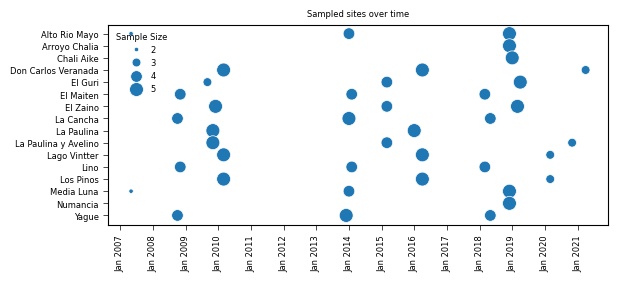

In [ ]:

import matplotlib.dates as mdates

# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/MARAS_overview_plot'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Set up the plot (simplified figsize directly in inches)
fig = plt.figure(figsize=(5, 2))  # 5 inches by 2 inches for example
ax = fig.add_subplot(111)

# Create the scatter plot with size determined by 'sampled'
sns.scatterplot(data=date_df, x='date', y='Site_Name', size='sampled', sizes=(10, 100), legend="full")

# Set labels and title
plt.xlabel('')
plt.ylabel('')
ax.set_title('Sampled sites over time', fontsize=6)

# Set label sizes for ticks
ax.tick_params(axis='y', labelsize=6, width=0.5)
ax.tick_params(axis='x', labelsize=6, width=0.5, rotation = 90)

# Format the x-axis to display month and year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.YearLocator())  # Place ticks at each year

# Add a legend for the size of the dots
plt.legend(title="Sample Size", fontsize=6, title_fontsize=6, loc='upper left', markerscale=1, frameon = False)

# Remove extra space: explicitly set axes position
ax.set_position([0, 0, 1, 1])  # Fill the entire figure area

# Save the figure as a PDF with precise size
#file_path = os.path.join(save_path, "MARAS_overview.pdf")
#fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
#plt.close(fig)

#print(f"Figure saved to {file_path}")

# Display the plot (if needed in an interactive environment)
fig.show()


## The plot version 2 (bar plot)

In [ ]:

# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/MARAS_overview_plot'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)



# Ensure 'year_month' is a string for plotting purposes
monthly_season_counts_updated['year_month'] = monthly_season_counts_updated['year_month'].astype(str)

# Create the bar plot
# Set up the plot (simplified figsize directly in inches)
fig = plt.figure(figsize=(2.9/2.54*5, 2.9/2.54*2))  # Convert cm to inches
ax = fig.add_subplot(111)
sns.barplot(data=monthly_season_counts_updated, x='year_month', y='no', hue='season', palette='summer')

# Customize the plot
plt.title('Monthly Counts Colored by Season', fontsize=6)
plt.xlabel('Year-Month', fontsize=6)
plt.ylabel('Number of Counts', fontsize=6)
plt.yticks(fontsize=6)  # Set y-axis ticks font size

# Filter x-axis labels to only show those ending with '-01'
tick_labels = monthly_season_counts_updated['year_month']
ticks_to_show = [label if label.endswith('-01') else '' for label in tick_labels]
plt.xticks(ticks=range(len(tick_labels)), labels=ticks_to_show, rotation=90, fontsize=6, ha='center')  # Center alignment

plt.legend(title='Season', fontsize=6, title_fontsize=6)  # Adjust legend font size


# Remove extra space: explicitly set axes position
ax.set_position([0, 0, 1, 1])  # Fill the entire figure area

# Save the figure as a PDF with precise size
file_path = os.path.join(save_path, "MARAS_overview_v2.pdf")
fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
plt.close(fig)

print(f"Figure saved to {file_path}")

# Display the plot (if needed in an interactive environment)
fig.show()



Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/MARAS_overview_plot/MARAS_overview_v2.pdf


# Scatterplots

## Variables and SPEI


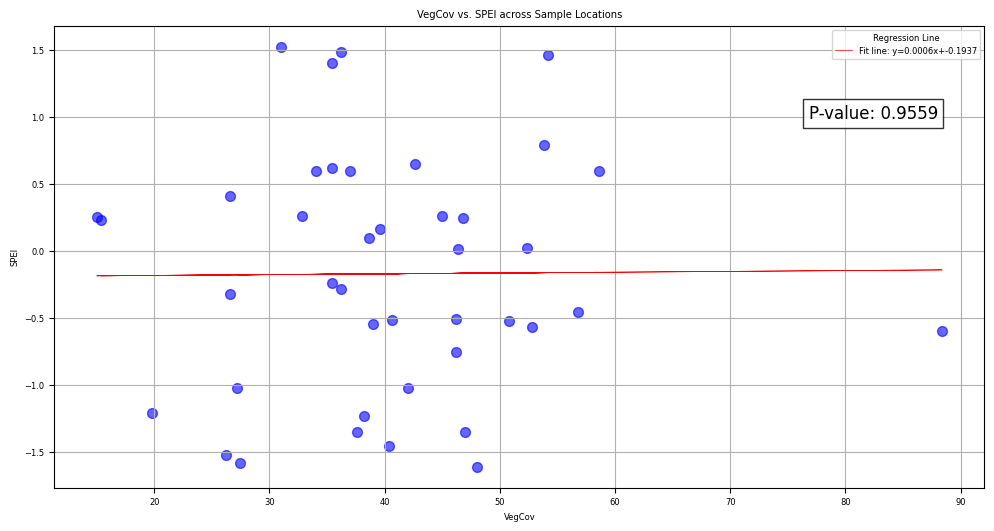

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/VegCov_vs_SPEI.png
Results for VegCov:
Slope: 0.0006
Intercept: -0.1937
R-value: 0.01
P-value of the slope: 0.9559
Standard error: 0.01082

--------------------------------------------------



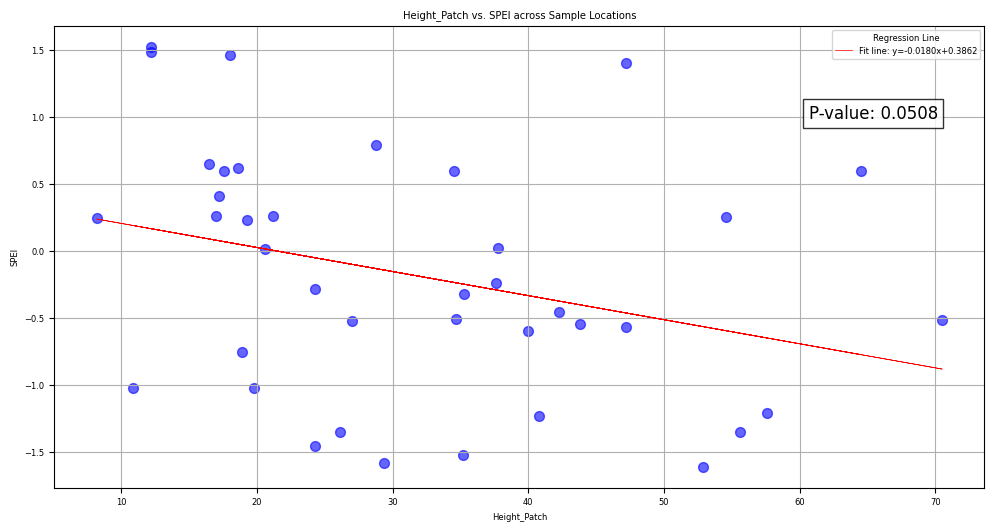

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/Height_Patch_vs_SPEI.png
Results for Height_Patch:
Slope: -0.0180
Intercept: 0.3862
R-value: -0.31
P-value of the slope: 0.0508
Standard error: 0.00890

--------------------------------------------------



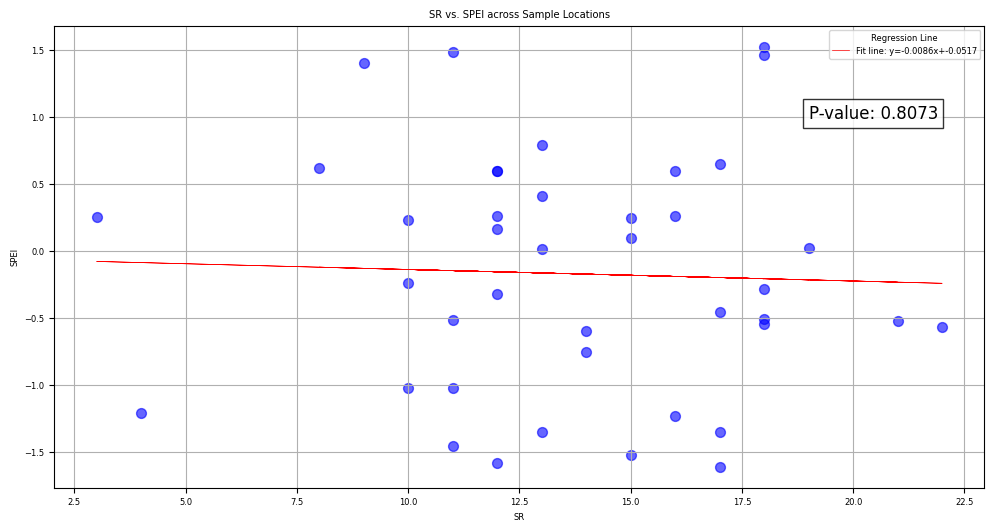

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/SR_vs_SPEI.png
Results for SR:
Slope: -0.0086
Intercept: -0.0517
R-value: -0.04
P-value of the slope: 0.8073
Standard error: 0.03496

--------------------------------------------------



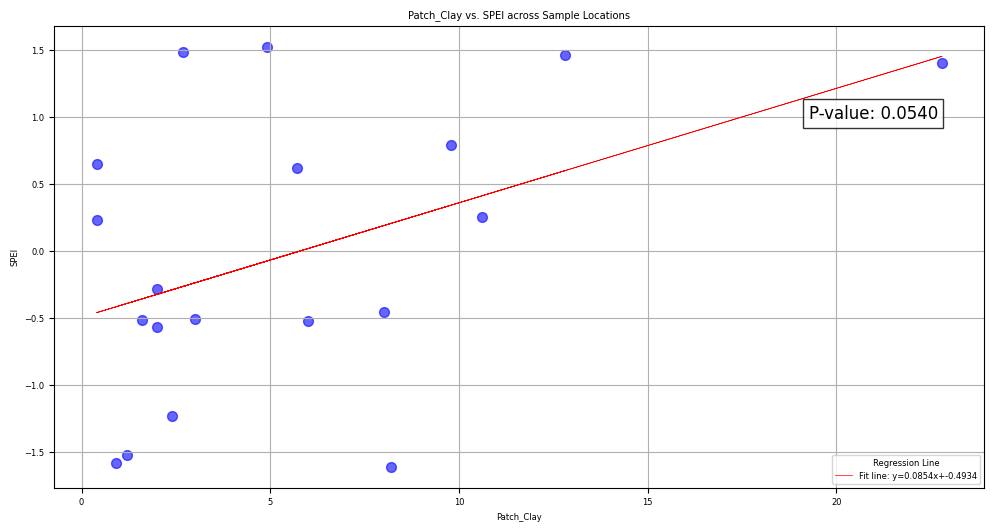

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/Patch_Clay_vs_SPEI.png
Results for Patch_Clay:
Slope: 0.0854
Intercept: -0.4934
R-value: 0.45
P-value of the slope: 0.0540
Standard error: 0.04123

--------------------------------------------------



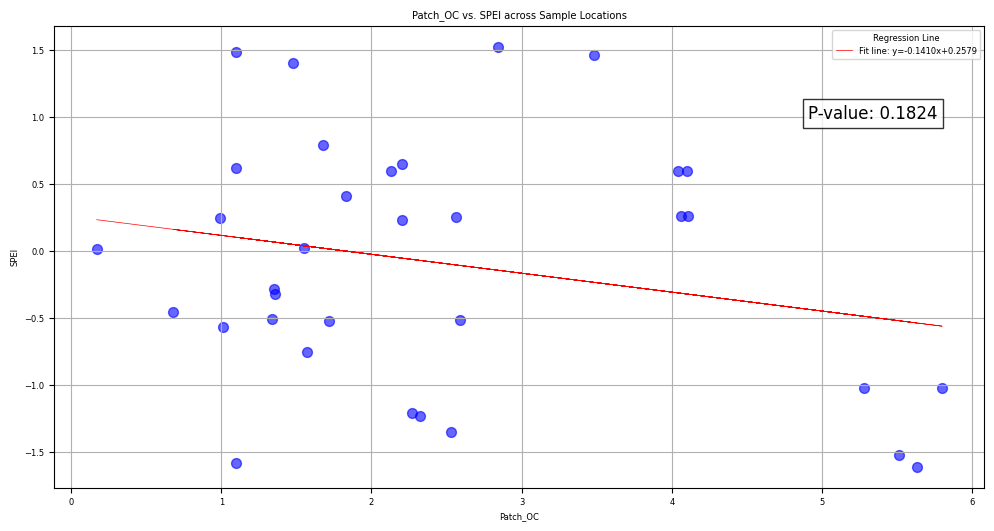

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/Patch_OC_vs_SPEI.png
Results for Patch_OC:
Slope: -0.1410
Intercept: 0.2579
R-value: -0.23
P-value of the slope: 0.1824
Standard error: 0.10348

--------------------------------------------------



In [ ]:
# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define variables
#variables_to_analyze = ["VegCov", "Height_Patch", "Litter", "SR", "Patch_Clay", "Infiltration", "Nutri_Recy", "Patch_OC"]

# Loop over each column to perform the regression and plotting
for column in variables_to_analyze:
    # Filter for non-null 'SPEI' and the current column values
    scatterplot_data = only_sampled_date_subandean_grassland[['year_month', 'SPEI', column]].dropna(subset=['SPEI', column])

    if scatterplot_data.empty:
        print(f"No valid data for {column}. Skipping...")
        continue

    # Perform linear regression with column as x and SPEI as y
    slope, intercept, r_value, p_value, std_err = stats.linregress(scatterplot_data[column], scatterplot_data['SPEI'])

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(scatterplot_data[column], scatterplot_data['SPEI'], color='blue', alpha=0.6, s=50)  # Increased dot size (s=50)
    plt.plot(
        scatterplot_data[column],
        intercept + slope * scatterplot_data[column],
        color='red',
        label=f"Fit line: y={slope:.4f}x+{intercept:.4f}"
    )
    plt.title(f"{column} vs. SPEI across Sample Locations")
    plt.xlabel(column)
    plt.ylabel("SPEI")
    plt.grid(True)

    # Get plot limits for dynamic positioning of the p-value annotation
    x_lim = plt.gca().get_xlim()
    y_lim = plt.gca().get_ylim()

    # Annotate the p-value slightly inside the top-right corner
    plt.text(
        x=x_lim[1] - (x_lim[1] - x_lim[0]) * 0.05,  # 5% margin from the right
        y=y_lim[1] - (y_lim[1] - y_lim[0]) * 0.20,
        s=f"P-value: {p_value:.4f}",
        fontsize=12,
        ha='right',  # Align text to the right
        bbox=dict(facecolor='white', alpha=0.8)
    )

    # Add legend
    plt.legend(title="Regression Line")

    # Save the figure to the defined folder
    file_path = os.path.join(save_path, f"{column}_vs_SPEI.png")
    plt.savefig(file_path, dpi=300)
    plt.show()

    print(f"Figure saved to {file_path}")

    # Print out regression results
    print(f"Results for {column}:")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value of the slope: {p_value:.4f}")
    print(f"Standard error: {std_err:.5f}")
    print("\n" + "-"*50 + "\n")


### Version for Illustrator: PDF files

In [ ]:

# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define variables
#variables_to_analyze = ["VegCov", "Height_Patch", "Litter", "SR", "Patch_Clay", "Infiltration", "Nutri_Recy", "Patch_OC"]

# Set global parameters for font size and line width
plt.rcParams.update({
    'font.size': 6,
    'lines.linewidth': 0.5
})

# Loop over each column to perform the regression and plotting
for column in variables_to_analyze:
    # Filter for non-null 'SPEI' and the current column values
    scatterplot_data = only_sampled_date_subandean_grassland[['year_month', 'SPEI', column]].dropna(subset=['SPEI', column])

    if scatterplot_data.empty:
        print(f"No valid data for {column}. Skipping...")
        continue

    scatterplot_data[column] = pd.to_numeric(scatterplot_data[column], errors='coerce')

    # Perform linear regression with column as x and SPEI as y
    slope, intercept, r_value, p_value, std_err = stats.linregress(scatterplot_data[column], scatterplot_data['SPEI'])

    # Create figure and axes
    fig = plt.figure(figsize=(2.9/2.54, 2.9/2.54))  # Convert cm to inches
    ax = fig.add_subplot(111)

    # Scatter plot and regression line
    ax.scatter(scatterplot_data[column], scatterplot_data['SPEI'], color='blue', alpha=0.6, s=10)  # Dot size scaled down
    ax.plot(
        scatterplot_data[column],
        intercept + slope * scatterplot_data[column],
        color='red'
    )

    # Set labels and grid
    ax.set_title(f"{column} vs. SPEI", fontsize=6)
    ax.set_xlabel(column, fontsize=6)
    ax.set_ylabel("SPEI", fontsize=6)
    ax.grid(False)

    # Remove extra space: explicitly set axes position
    ax.set_position([0, 0, 1, 1])  # Fill the entire figure area

    # Annotate the p-value in the top-right corner
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.text(
        x=x_lim[1] - (x_lim[1] - x_lim[0]) * 0.05,  # 5% margin from the right
        y=y_lim[1] - (y_lim[1] - y_lim[0]) * 0.20,
        s=f"P-value: {p_value:.4f}",
        fontsize=6,
        ha='right',
        bbox=dict(facecolor='white', alpha=0.8)
    )

    # Save the figure as a PDF with precise size
    file_path = os.path.join(save_path, f"{column}_vs_SPEI.pdf")
    fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    print(f"Figure saved to {file_path}")

    # Print out regression results
    print(f"Results for {column}:")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value of the slope: {p_value:.4f}")
    print(f"Standard error: {std_err:.5f}")
    print("\n" + "-"*50 + "\n")


Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/VegCov_vs_SPEI.pdf
Results for VegCov:
Slope: 0.0006
Intercept: -0.1937
R-value: 0.01
P-value of the slope: 0.9559
Standard error: 0.01082

--------------------------------------------------

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/Height_Patch_vs_SPEI.pdf
Results for Height_Patch:
Slope: -0.0180
Intercept: 0.3862
R-value: -0.31
P-value of the slope: 0.0508
Standard error: 0.00890

--------------------------------------------------

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/SR_vs_SPEI.pdf
Results for SR:
Slope: -0.0086
Intercept: -0.0517
R-value: -0.04
P-value of the slope: 0.8073
Standard error: 0.03496

--------------------------------------------------

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/SPEI_Variables_Figures/Patch_Clay_vs_SPEI.pdf
Results for Patch_Clay:
Slope: 0.0854
Intercep

## Variables and NDVI

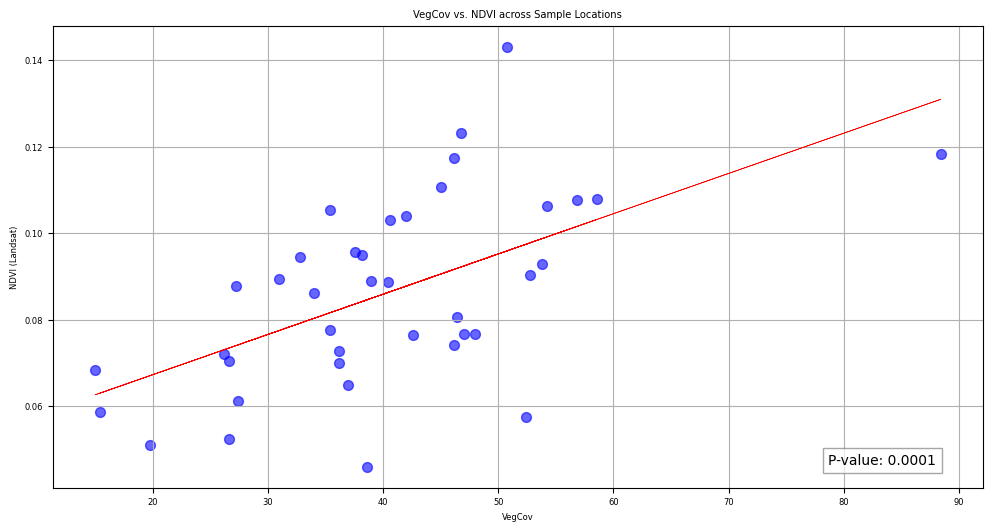

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/VegCov_vs_NDVI.png
Results for VegCov:
Slope per month: 0.0009
Intercept: 0.0487
R-value: 0.57
P-value of the slope: 0.0001
Standard error: 0.00022
Slope per year: 0.0112

--------------------------------------------------



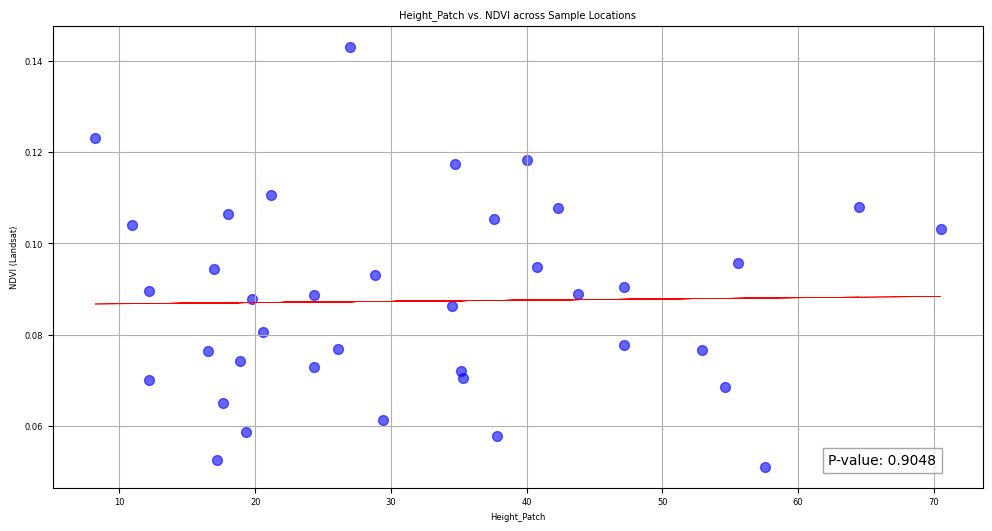

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/Height_Patch_vs_NDVI.png
Results for Height_Patch:
Slope per month: 0.0000
Intercept: 0.0865
R-value: 0.02
P-value of the slope: 0.9048
Standard error: 0.00022
Slope per year: 0.0003

--------------------------------------------------



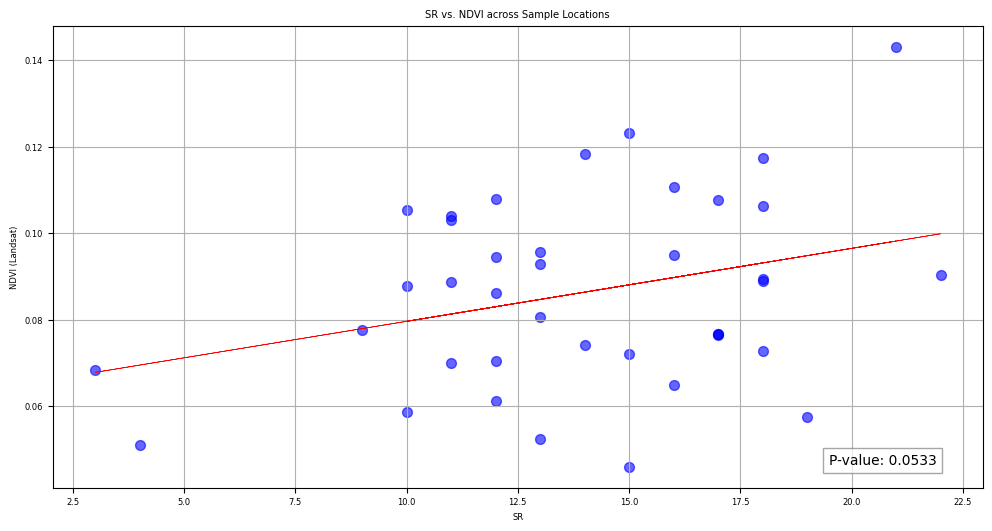

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/SR_vs_NDVI.png
Results for SR:
Slope per month: 0.0017
Intercept: 0.0628
R-value: 0.31
P-value of the slope: 0.0533
Standard error: 0.00085
Slope per year: 0.0202

--------------------------------------------------



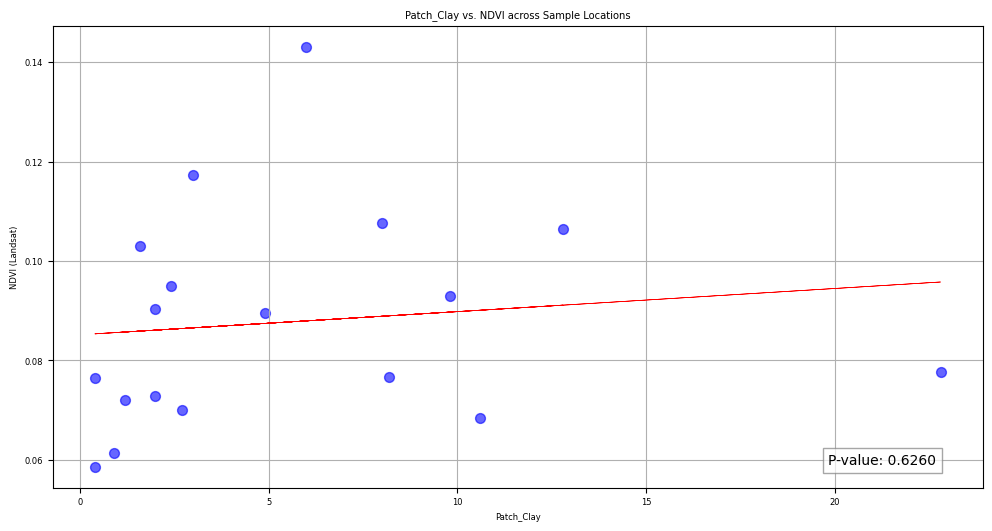

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/Patch_Clay_vs_NDVI.png
Results for Patch_Clay:
Slope per month: 0.0005
Intercept: 0.0852
R-value: 0.12
P-value of the slope: 0.6260
Standard error: 0.00094
Slope per year: 0.0056

--------------------------------------------------



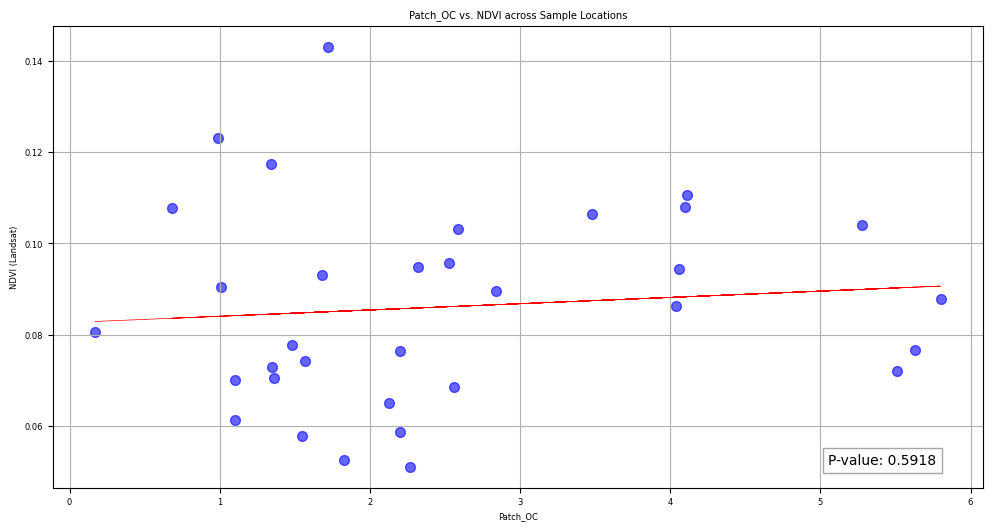

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/Patch_OC_vs_NDVI.png
Results for Patch_OC:
Slope per month: 0.0014
Intercept: 0.0826
R-value: 0.10
P-value of the slope: 0.5918
Standard error: 0.00254
Slope per year: 0.0165

--------------------------------------------------



In [ ]:
# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define the variables for the scatterplots
#variables_to_analyze = ["VegCov", "Height_Patch", "Litter", "SR", "Patch_Clay", "Infiltration", "Nutri_Recy", "Patch_OC"]

# Ensure 'year_month' is in datetime format
only_sampled_date_subandean_grassland['year_month'] = pd.to_datetime(only_sampled_date_subandean_grassland['year_month'], format='%Y_%m')

# Loop over each column to perform the regression and plotting
for column in variables_to_analyze:
    # Filter for non-null 'NDVI' and the current column values
    scatterplot_data = only_sampled_date_subandean_grassland[['year_month', 'NDVI_Landsat', column]].dropna(subset=['NDVI_Landsat', column])

    if scatterplot_data.empty:
        print(f"No valid data for {column}. Skipping...")
        continue

    # Perform linear regression on the switched x and y
    slope, intercept, r_value, p_value, std_err = stats.linregress(scatterplot_data[column], scatterplot_data['NDVI_Landsat'])

    # Calculate the slope per year by multiplying the monthly slope by 12
    slope_per_year = slope * 12

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.scatter(
        scatterplot_data[column],
        scatterplot_data['NDVI_Landsat'],
        color='blue',
        alpha=0.6,
        s=50  # Increased dot size
    )
    plt.plot(
        scatterplot_data[column],
        intercept + slope * scatterplot_data[column],
        color='red',
        label=f"Fit line: y={slope:.4f}x+{intercept:.4f}"
    )
    plt.title(f"{column} vs. NDVI across Sample Locations")
    plt.xlabel(column)
    plt.ylabel("NDVI (Landsat)")
    plt.grid(True)

    # Add the p-value as a text annotation in the top-right corner
    plt.text(
        0.95, 0.05,  # Adjust position as needed (relative to the axes)
        f"P-value: {p_value:.4f}",
        fontsize=10,
        transform=plt.gca().transAxes,
        ha='right',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray')
    )

    # Save the figure to the specified folder
    file_path = os.path.join(save_path, f"{column}_vs_NDVI.png")
    plt.savefig(file_path, dpi=300)
    plt.show()

    print(f"Figure saved to {file_path}")

    # Print out regression results
    print(f"Results for {column}:")
    print(f"Slope per month: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R-value: {r_value:.2f}")
    print(f"P-value of the slope: {p_value:.4f}")
    print(f"Standard error: {std_err:.5f}")
    print(f"Slope per year: {slope_per_year:.4f}")
    print("\n" + "-"*50 + "\n")


### Version for Illustrator: PDF files

In [ ]:

# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define variables
#variables_to_analyze = ["VegCov", "Height_Patch", "Litter", "SR", "Patch_Clay", "Infiltration", "Nutri_Recy", "Patch_OC"]

# Set global parameters for font size and line width
plt.rcParams.update({
    'font.size': 6,
    'lines.linewidth': 0.5
})

# Loop over each column to perform the regression and plotting
for column in variables_to_analyze:
    # Filter for non-null 'NDVI_Landsat' and the current column values
    scatterplot_data = only_sampled_date_subandean_grassland[['year_month', 'NDVI_Landsat', column]].dropna(subset=['NDVI_Landsat', column])

    if scatterplot_data.empty:
        print(f"No valid data for {column}. Skipping...")
        continue

    # Perform linear regression with column as x and NDVI_Landsat as y
    slope, intercept, r_value, p_value, std_err = stats.linregress(scatterplot_data[column], scatterplot_data['NDVI_Landsat'])

    # Create figure and axes
    fig = plt.figure(figsize=(2.9/2.54, 2.9/2.54))  # Convert cm to inches
    ax = fig.add_subplot(111)

    # Scatter plot and regression line
    ax.scatter(scatterplot_data[column], scatterplot_data['NDVI_Landsat'], color='blue', alpha=0.6, s=10)  # Dot size scaled down
    ax.plot(
        scatterplot_data[column],
        intercept + slope * scatterplot_data[column],
        color='red',
    )

    # Set labels and grid
    ax.set_title(f"{column} vs. NDVI_Landsat", fontsize=6)
    ax.set_xlabel(column, fontsize=6)
    ax.set_ylabel("NDVI_Landsat", fontsize=6)
    ax.grid(False)

    # Remove extra space: explicitly set axes position
    ax.set_position([0, 0, 1, 1])  # Fill the entire figure area

    # Annotate the p-value in the top-right corner
    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()
    ax.text(
        x=x_lim[1] - (x_lim[1] - x_lim[0]) * 0.05,  # 5% margin from the right
        y=y_lim[1] - (y_lim[1] - y_lim[0]) * 0.20,
        s=f"P-value: {p_value:.4f}",
        fontsize=6,
        ha='right',
        bbox=dict(facecolor='white', alpha=0.8)
    )

    # Save the figure as a PDF with precise size
    file_path = os.path.join(save_path, f"{column}_vs_NDVI.pdf")
    fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    print(f"Figure saved to {file_path}")



Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/VegCov_vs_NDVI.pdf
Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/Height_Patch_vs_NDVI.pdf
Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/SR_vs_NDVI.pdf
Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/Patch_Clay_vs_NDVI.pdf
Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/NDVI_Variables_Figures/Patch_OC_vs_NDVI.pdf


# Boxplots per time period


--- Analyzing VegCov ---

                 median    Q1    Q3   IQR
Time_Period                              
2000 until 2010    36.2  35.4  39.6   4.2
2011 until 2016    38.2  27.2  46.2  19.0
From 2017          46.2  37.6  52.6  15.0


<ipython-input-92-c6c31367ae61>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2000_2010["Time_Period"] = "2000 until 2010"
<ipython-input-92-c6c31367ae61>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011_2016["Time_Period"] = "2011 until 2016"
<ipython-input-92-c6c31367ae61>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

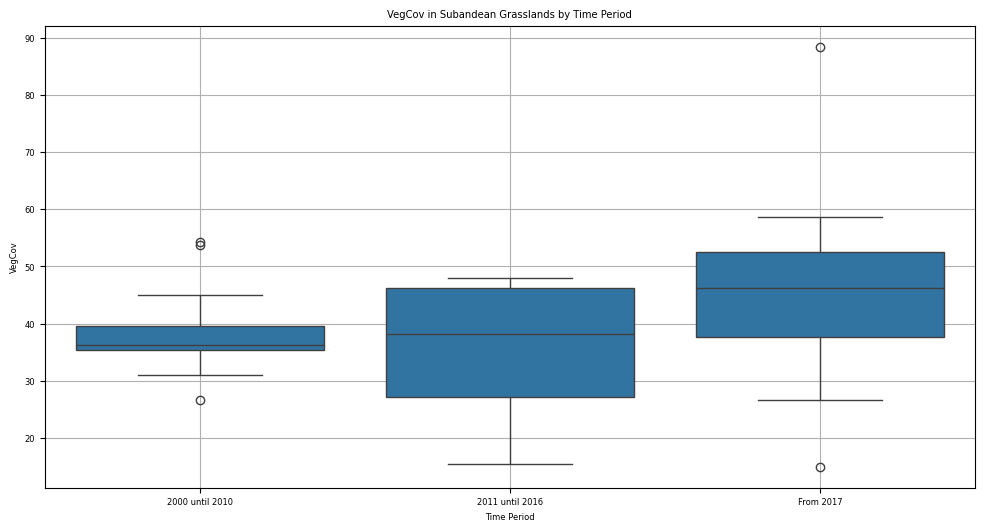

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/VegCov_Boxplot.png

--- Analyzing Height_Patch ---

                 median     Q1    Q3    IQR
Time_Period                                
2000 until 2010    18.0    NaN   NaN    NaN
2011 until 2016    20.6  18.90  40.8  21.90
From 2017          37.8  30.75  45.5  14.75


<ipython-input-92-c6c31367ae61>:36: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


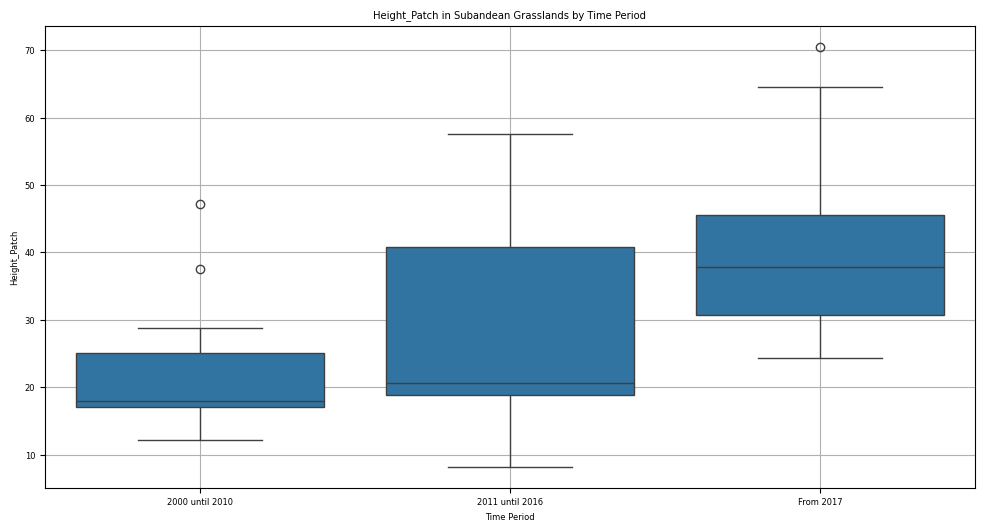

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/Height_Patch_Boxplot.png

--- Analyzing SR ---

                 median    Q1    Q3  IQR
Time_Period                             
2000 until 2010    13.0  11.0  16.0  5.0
2011 until 2016    13.0  11.0  15.0  4.0
From 2017          17.0  12.0  18.0  6.0


<ipython-input-92-c6c31367ae61>:36: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


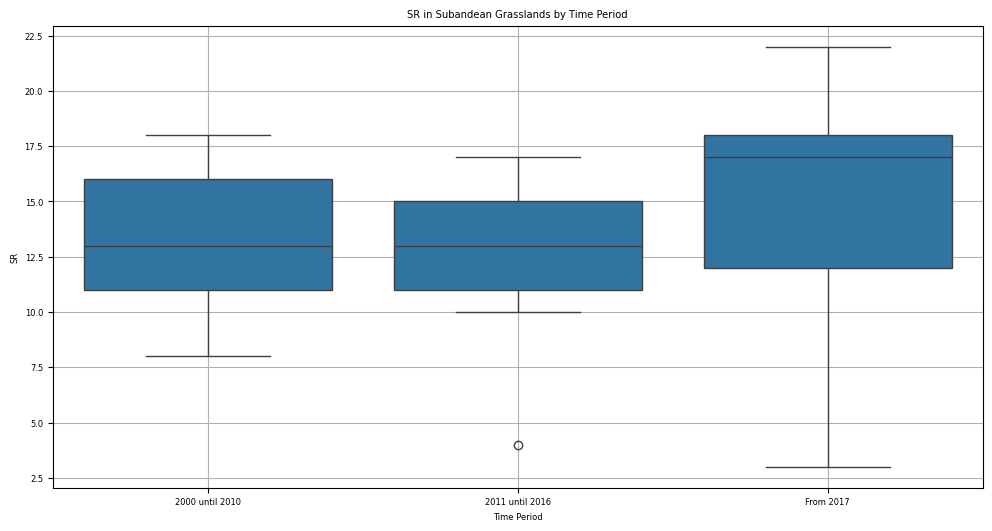

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/SR_Boxplot.png

--- Analyzing Patch_Clay ---

                 median  Q1  Q3  IQR
Time_Period                         
2000 until 2010    7.75 NaN NaN  NaN
2011 until 2016    1.05 NaN NaN  NaN
From 2017          3.00 NaN NaN  NaN


<ipython-input-92-c6c31367ae61>:36: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


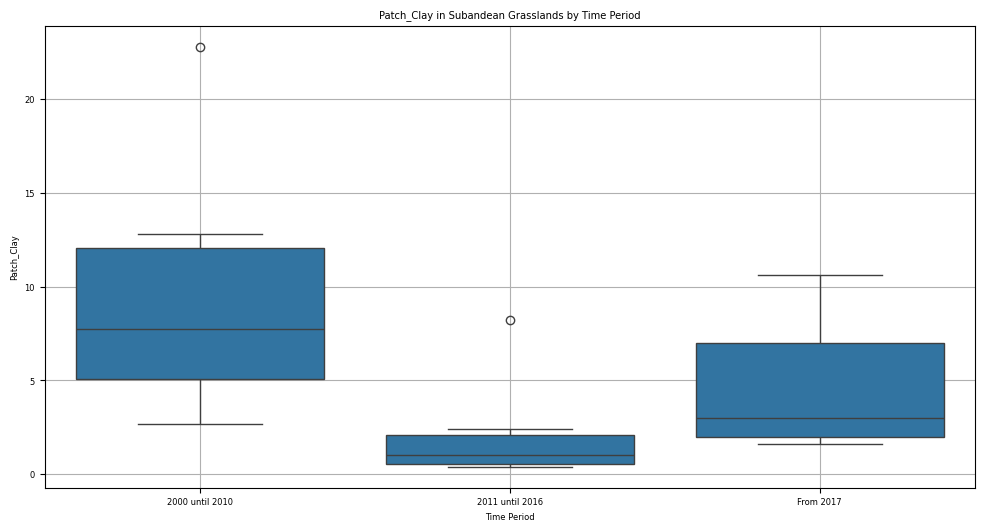

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/Patch_Clay_Boxplot.png

--- Analyzing Patch_OC ---

                 median    Q1    Q3   IQR
Time_Period                              
2000 until 2010    1.98   NaN   NaN   NaN
2011 until 2016    2.27  1.57  5.28  3.71
From 2017          1.55   NaN   NaN   NaN


<ipython-input-92-c6c31367ae61>:36: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


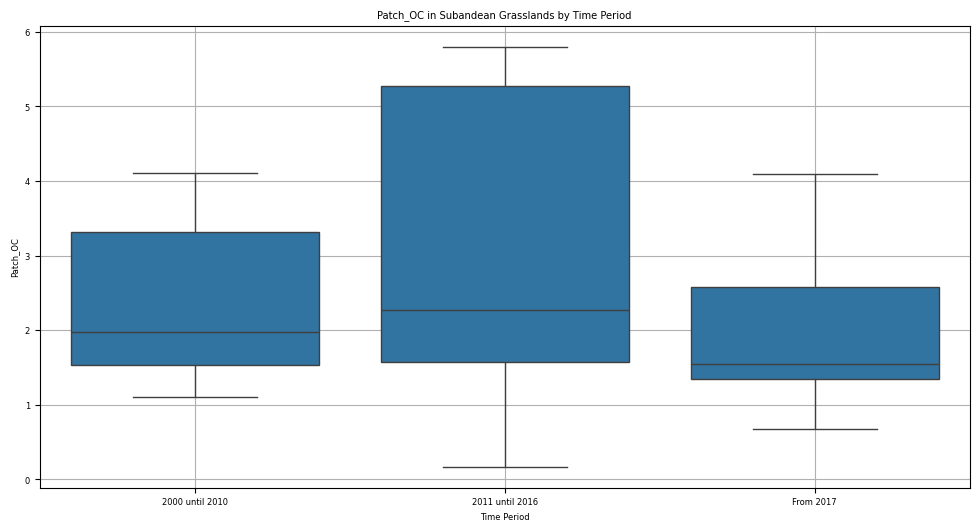

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/Patch_OC_Boxplot.png


In [ ]:
# Define the folder to save the boxplots
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define variables to analyze
#variables_to_analyze = ["VegCov", "Height_Patch", "Litter", "SR", "Patch_Clay", "Infiltration", "Nutri_Recy", "Patch_OC"]

# Filter the DataFrame to create subsets for different time periods
data_2000_2010 = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland["year"] >= 2000) &
    (only_sampled_date_subandean_grassland["year"] <= 2010)
]
data_2011_2016 = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland["year"] >= 2011) &
    (only_sampled_date_subandean_grassland["year"] <= 2016)
]
data_from_2017 = only_sampled_date_subandean_grassland[
    only_sampled_date_subandean_grassland["year"] >= 2017
]

# Add a new column to indicate the time period for the boxplots
data_2000_2010["Time_Period"] = "2000 until 2010"
data_2011_2016["Time_Period"] = "2011 until 2016"
data_from_2017["Time_Period"] = "From 2017"

# Combine the subsets into a single DataFrame
combined_data = pd.concat([data_2000_2010, data_2011_2016, data_from_2017])

# Loop through each variable to create boxplots and calculate statistics
for variable in variables_to_analyze:
    print(f"\n--- Analyzing {variable} ---\n")

    # Calculate descriptive statistics for each time period
    time_period_stats = combined_data.groupby("Time_Period")[variable].agg(
        median=np.median,
        Q1=lambda x: np.percentile(x, 25),  # First quartile (25th percentile)
        Q3=lambda x: np.percentile(x, 75),  # Third quartile (75th percentile)
    )

    # Add IQR to the statistics
    time_period_stats["IQR"] = time_period_stats["Q3"] - time_period_stats["Q1"]

    # Print the statistics
    print(time_period_stats)

    # Create the boxplot using Seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=combined_data, x="Time_Period", y=variable)

    # Customize the plot
    plt.title(f"{variable} in Subandean Grasslands by Time Period")
    plt.xlabel("Time Period")
    plt.ylabel(variable)
    plt.grid(True)

    # Save the figure to the specified folder
    file_path = os.path.join(save_path, f"{variable}_Boxplot.png")
    plt.savefig(file_path, dpi=300)
    plt.show()

    print(f"Figure saved to {file_path}")


### PDF version


--- Analyzing VegCov ---

                 median    Q1    Q3   IQR
Time_Period                              
2000 until 2010    36.2  35.4  39.6   4.2
2011 until 2016    38.2  27.2  46.2  19.0
From 2017          46.2  37.6  52.6  15.0


<ipython-input-93-389929af8853>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2000_2010["Time_Period"] = "2000 until 2010"
<ipython-input-93-389929af8853>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2011_2016["Time_Period"] = "2011 until 2016"
<ipython-input-93-389929af8853>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

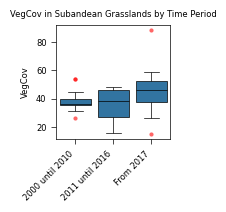

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/VegCov_Boxplot.pdf

--- Analyzing Height_Patch ---

                 median     Q1    Q3    IQR
Time_Period                                
2000 until 2010    18.0    NaN   NaN    NaN
2011 until 2016    20.6  18.90  40.8  21.90
From 2017          37.8  30.75  45.5  14.75


<ipython-input-93-389929af8853>:42: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


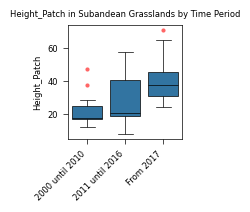

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/Height_Patch_Boxplot.pdf

--- Analyzing SR ---

                 median    Q1    Q3  IQR
Time_Period                             
2000 until 2010    13.0  11.0  16.0  5.0
2011 until 2016    13.0  11.0  15.0  4.0
From 2017          17.0  12.0  18.0  6.0


<ipython-input-93-389929af8853>:42: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


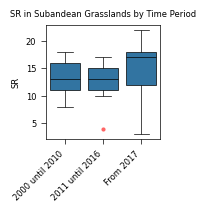

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/SR_Boxplot.pdf

--- Analyzing Patch_Clay ---

                 median  Q1  Q3  IQR
Time_Period                         
2000 until 2010    7.75 NaN NaN  NaN
2011 until 2016    1.05 NaN NaN  NaN
From 2017          3.00 NaN NaN  NaN


<ipython-input-93-389929af8853>:42: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


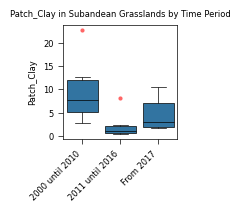

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/Patch_Clay_Boxplot.pdf

--- Analyzing Patch_OC ---

                 median    Q1    Q3   IQR
Time_Period                              
2000 until 2010    1.98   NaN   NaN   NaN
2011 until 2016    2.27  1.57  5.28  3.71
From 2017          1.55   NaN   NaN   NaN


<ipython-input-93-389929af8853>:42: FutureWarning: The provided callable <function median at 0x798b53c10ca0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  time_period_stats = combined_data.groupby("Time_Period")[variable].agg(


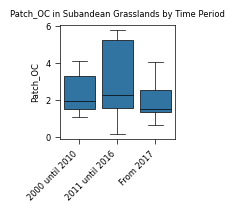

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod/Patch_OC_Boxplot.pdf


In [ ]:
# Define the folder to save the boxplots
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/Boxplots_per_TimePeriod'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# Define variables to analyze
#variables_to_analyze = ["VegCov", "Height_Patch", "Litter", "SR", "Patch_Clay", "Infiltration", "Nutri_Recy", "Patch_OC"]

# Set global parameters for font size and line width
plt.rcParams.update({
    'font.size': 6,
    'lines.linewidth': 0.5
})

# Filter the DataFrame to create subsets for different time periods
data_2000_2010 = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland["year"] >= 2000) &
    (only_sampled_date_subandean_grassland["year"] <= 2010)
]
data_2011_2016 = only_sampled_date_subandean_grassland[
    (only_sampled_date_subandean_grassland["year"] >= 2011) &
    (only_sampled_date_subandean_grassland["year"] <= 2016)
]
data_from_2017 = only_sampled_date_subandean_grassland[
    only_sampled_date_subandean_grassland["year"] >= 2017
]

# Add a new column to indicate the time period for the boxplots
data_2000_2010["Time_Period"] = "2000 until 2010"
data_2011_2016["Time_Period"] = "2011 until 2016"
data_from_2017["Time_Period"] = "From 2017"

# Combine the subsets into a single DataFrame
combined_data = pd.concat([data_2000_2010, data_2011_2016, data_from_2017])

# Loop through each variable to create boxplots and calculate statistics
for variable in variables_to_analyze:
    print(f"\n--- Analyzing {variable} ---\n")

    # Calculate descriptive statistics for each time period
    time_period_stats = combined_data.groupby("Time_Period")[variable].agg(
        median=np.median,
        Q1=lambda x: np.percentile(x, 25),  # First quartile (25th percentile)
        Q3=lambda x: np.percentile(x, 75),  # Third quartile (75th percentile)
    )

    # Add IQR to the statistics
    time_period_stats["IQR"] = time_period_stats["Q3"] - time_period_stats["Q1"]

    # Print the statistics
    print(time_period_stats)

    # Create the boxplot using Seaborn
    # Create figure and axes
    fig = plt.figure(figsize=(2.9/2.54, 2.9/2.54))  # Convert cm to inches
    ax = fig.add_subplot(111)

    #plt.figure(figsize=(2.9 / 2.54, 2.9 / 2.54))  # Convert cm to inches (2.9 cm = 2.9 / 2.54 inches)
    sns.boxplot(data=combined_data, x="Time_Period", y=variable, ax=ax,
                flierprops = flierprops, boxprops = boxprops, whiskerprops = whiskerprops, capprops = capprops,
                medianprops = medianprops)


    ax.set_title(f"{variable} in Subandean Grasslands by Time Period", fontsize=6)
    ax.set_xlabel("", fontsize=6)
    ax.set_ylabel(variable, fontsize=6)
    ax.tick_params(axis='x', labelsize=6, width = 0.5)  # Font size for x-axis tick labels
    ax.tick_params(axis='y', labelsize=6, width = 0.5)  # Font size for y-axis tick labels
    ax.grid(False)

    # Rotate the x-axis labels to 45 degrees
    ax.set_xticks(range(len(combined_data["Time_Period"].unique())))  # Set ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=6)

    # Remove extra space: explicitly set axes position
    ax.set_position([0, 0, 1, 1])  # Fill the entire figure area

    # Set the spine edge widths
    for spine in ax.spines.values():
      spine.set_linewidth(0.5)

    # Save the figure to the specified folder as a PDF
    file_path = os.path.join(save_path, f"{variable}_Boxplot.pdf")
    plt.show()
    fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    print(f"Figure saved to {file_path}")


Old versions below

# Boxplots per correlation group

## Preparation of df

## Import df "correlation_2000_2024_per_location".

In [ ]:
# Specify the path to the CSV file in your Google Drive
file_path = '/content/drive/My Drive/ee-meinzinger-patagonia/correlation_2000_2024_per_location.csv'

# Load the CSV file into a DataFrame
correlation_2000_2024_per_location = pd.read_csv(file_path)

# Verify the loaded DataFrame
correlation_2000_2024_per_location


,Site_Name,Corr_Sep_to_Mar
0,El Guri,0.543182
1,Don Carlos Veranada,0.487151
2,El Zaino,0.472008
3,Los Pinos,0.348512
4,Media Luna,0.247850
5,Numancia,0.219944
6,Lino,0.208439
7,El Maiten,0.162071
8,La Paulina y Avelino,0.158972
9,Lago Vintter,0.147545


## Add new column "Corr_group".

In [ ]:
# Add a new column 'Corr_group' based on the categorization of 'Corr_Sep_to_Mar'
correlation_2000_2024_per_location['Corr_group'] = pd.cut(
    correlation_2000_2024_per_location['Corr_Sep_to_Mar'],
    bins=[-float('inf'), 0.2, 0.4, float('inf')],
    labels=['very_low_corr', 'low_corr', 'moderate_corr']
)

# Display the updated DataFrame
correlation_2000_2024_per_location

,Site_Name,Corr_Sep_to_Mar,Corr_group
0,El Guri,0.543182,moderate_corr
1,Don Carlos Veranada,0.487151,moderate_corr
2,El Zaino,0.472008,moderate_corr
3,Los Pinos,0.348512,low_corr
4,Media Luna,0.247850,low_corr
5,Numancia,0.219944,low_corr
6,Lino,0.208439,low_corr
7,El Maiten,0.162071,very_low_corr
8,La Paulina y Avelino,0.158972,very_low_corr
9,Lago Vintter,0.147545,very_low_corr


## Merge "correlation_2000_2024_per_location" with "only_sampled_date_subandean_grassland".

In [ ]:
# Merge the DataFrames on 'Site_Name'
subandean_grassland_with_corr_group = pd.merge(
    only_sampled_date_subandean_grassland,
    correlation_2000_2024_per_location,
    on="Site_Name",
    how="left"
)

# Display
subandean_grassland_with_corr_group

,year_month,year,Site_Name,SPEI,NDVI_Landsat,VegCov,Height_Patch,SR,Patch_Clay,Patch_OC,Corr_Sep_to_Mar,Corr_group
0,2007-05-01,2007,Alto Rio Mayo,0.162070,NaN,39.6,NaN,12.0,NaN,NaN,-0.003040,very_low_corr
1,2014-01-01,2014,Alto Rio Mayo,0.018064,0.08060,46.4,20.6,13.0,NaN,0.17,-0.003040,very_low_corr
2,2018-12-01,2018,Alto Rio Mayo,-0.564834,0.09040,52.8,47.2,22.0,2.0,1.01,-0.003040,very_low_corr
3,2018-12-01,2018,Arroyo Chalia,-0.456191,0.10775,56.8,42.3,17.0,8.0,0.68,-0.003244,very_low_corr
4,2019-01-01,2019,Chali Aike,-0.285656,0.07280,36.2,24.3,18.0,2.0,1.35,-0.210074,very_low_corr
5,2010-03-01,2010,Don Carlos Veranada,1.523990,0.08950,31.0,12.2,18.0,4.9,2.84,0.487151,moderate_corr
6,2016-04-01,2016,Don Carlos Veranada,-1.519355,0.07200,26.2,35.2,15.0,1.2,5.51,0.487151,moderate_corr
7,2021-04-01,2021,Don Carlos Veranada,-1.349794,0.07680,47.0,26.1,17.0,NaN,NaN,0.487151,moderate_corr
8,2009-09-01,2009,El Guri,-0.238431,0.10530,35.4,37.6,10.0,NaN,NaN,0.543182,moderate_corr
9,2015-03-01,2015,El Guri,-1.351166,0.09560,37.6,55.6,13.0,NaN,2.53,0.543182,moderate_corr


## Boxplots

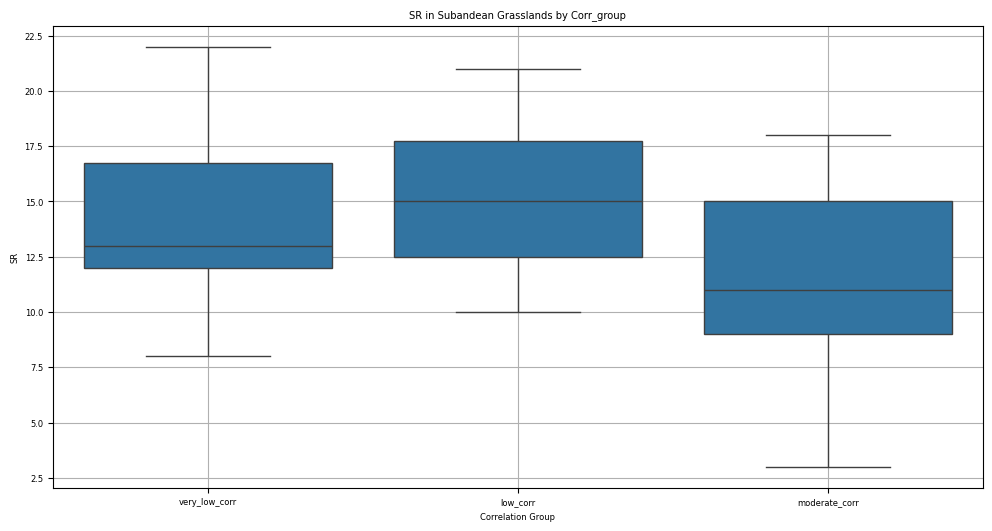

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplot_per_CorrGroup/SR_Boxplot_CorrGroup.png
Descriptive statistics for SR:
               count       mean       std   min   25%   50%    75%   max
Corr_group                                                              
very_low_corr   22.0  14.136364  3.440590   8.0  12.0  13.0  16.75  22.0
low_corr        10.0  15.200000  3.359894  10.0  12.5  15.0  17.75  21.0
moderate_corr    9.0  11.111111  5.278363   3.0   9.0  11.0  15.00  18.0

Median for SR by Corr_group:
Corr_group
very_low_corr    13.0
low_corr         15.0
moderate_corr    11.0
Name: SR, dtype: float64
Q1 for SR by Corr_group:
Corr_group
very_low_corr    12.0
low_corr         12.5
moderate_corr     9.0
Name: SR, dtype: float64
Q3 for SR by Corr_group:
Corr_group
very_low_corr    16.75
low_corr         17.75
moderate_corr    15.00
Name: SR, dtype: float64
IQR for SR by Corr_group:
Corr_group
very_low_corr    4.75
low_corr         5.25
moderate_corr    6.00
N

<ipython-input-97-3608990ec1ec>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = subandean_grassland_with_corr_group.groupby("Corr_group")[param].describe()
<ipython-input-97-3608990ec1ec>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median = subandean_grassland_with_corr_group.groupby("Corr_group")[param].median()
<ipython-input-97-3608990ec1ec>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

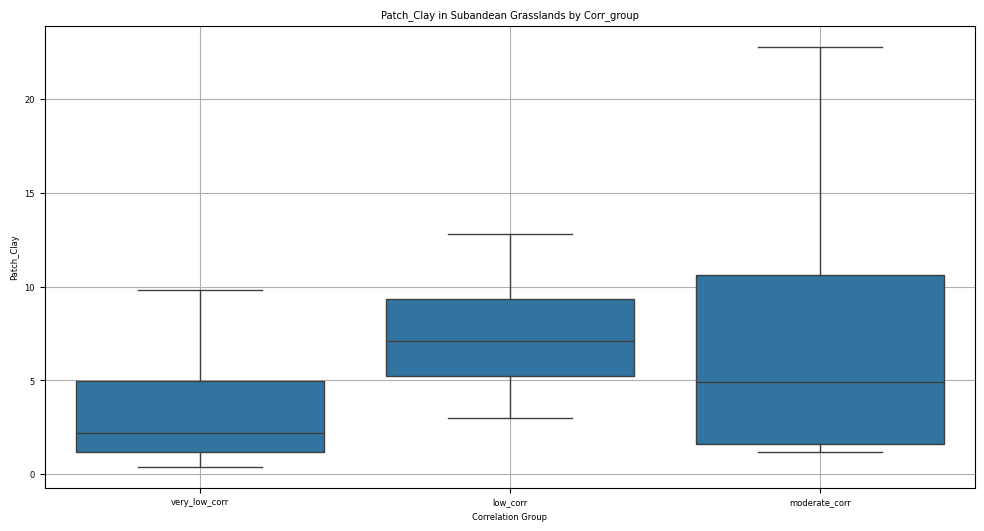

Figure saved to /content/drive/My Drive/ee-meinzinger-patagonia/Boxplot_per_CorrGroup/Patch_Clay_Boxplot_CorrGroup.png
Descriptive statistics for Patch_Clay:
               count  mean       std  min    25%  50%    75%   max
Corr_group                                                        
very_low_corr   10.0  3.43  3.283985  0.4  1.175  2.2   4.95   9.8
low_corr         4.0  7.50  4.126338  3.0  5.250  7.1   9.35  12.8
moderate_corr    5.0  8.22  8.977305  1.2  1.600  4.9  10.60  22.8

Median for Patch_Clay by Corr_group:
Corr_group
very_low_corr    2.2
low_corr         7.1
moderate_corr    4.9
Name: Patch_Clay, dtype: float64
Q1 for Patch_Clay by Corr_group:
Corr_group
very_low_corr    1.175
low_corr         5.250
moderate_corr    1.600
Name: Patch_Clay, dtype: float64
Q3 for Patch_Clay by Corr_group:
Corr_group
very_low_corr     4.95
low_corr          9.35
moderate_corr    10.60
Name: Patch_Clay, dtype: float64
IQR for Patch_Clay by Corr_group:
Corr_group
very_low_corr    3.775
lo

<ipython-input-97-3608990ec1ec>:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = subandean_grassland_with_corr_group.groupby("Corr_group")[param].describe()
<ipython-input-97-3608990ec1ec>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median = subandean_grassland_with_corr_group.groupby("Corr_group")[param].median()
<ipython-input-97-3608990ec1ec>:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

ValueError: Could not interpret value `Infiltration` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/Boxplot_per_CorrGroup'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# List of parameters to generate boxplots for
parameters = ["SR", "Patch_Clay", "Infiltration", "VegCov", "Height_Patch", "Litter", "Patch_OC"]

# Loop over the parameters and create a boxplot for each
for param in parameters:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=subandean_grassland_with_corr_group, x="Corr_group", y=param)

    # Customize the plot
    plt.title(f"{param} in Subandean Grasslands by Corr_group")
    plt.xlabel("Correlation Group")
    plt.ylabel(param)
    plt.grid(True)

    # Save the figure to the specified folder
    file_path = os.path.join(save_path, f"{param}_Boxplot_CorrGroup.png")
    plt.savefig(file_path, dpi=300)
    plt.show()

    print(f"Figure saved to {file_path}")

    # Calculate and display descriptive statistics
    descriptive_stats = subandean_grassland_with_corr_group.groupby("Corr_group")[param].describe()
    median = subandean_grassland_with_corr_group.groupby("Corr_group")[param].median()
    q1 = subandean_grassland_with_corr_group.groupby("Corr_group")[param].quantile(0.25)
    q3 = subandean_grassland_with_corr_group.groupby("Corr_group")[param].quantile(0.75)
    iqr = q3 - q1

    print(f"Descriptive statistics for {param}:")
    print(descriptive_stats)
    print(f"\nMedian for {param} by Corr_group:\n{median}")
    print(f"Q1 for {param} by Corr_group:\n{q1}")
    print(f"Q3 for {param} by Corr_group:\n{q3}")
    print(f"IQR for {param} by Corr_group:\n{iqr}")
    print("-" * 50)

### PDF versions of box plots

In [ ]:
# Define the folder to save figures
save_path = '/content/drive/My Drive/ee-meinzinger-patagonia/Boxplot_per_CorrGroup'

# Create the directory if it doesn't exist
os.makedirs(save_path, exist_ok=True)

# List of parameters to generate boxplots for
parameters = ["SR", "Patch_Clay", "Infiltration", "VegCov", "Height_Patch", "Litter", "Patch_OC","Nutri_Recy"]


# Loop over the parameters and create a boxplot for each
for param in parameters:

    # Create the boxplot using Seaborn
    # Create figure and axes
    fig = plt.figure(figsize=(2.9/2.54, 2.9/2.54))  # Convert cm to inches
    ax = fig.add_subplot(111)

    sns.boxplot(data=subandean_grassland_with_corr_group, x="Corr_group", y=param, ax=ax,
                flierprops = flierprops, boxprops = boxprops, whiskerprops = whiskerprops, capprops = capprops,
                medianprops = medianprops)

    # Customize the plot
    ax.set_title(f"{param} in Subandean Grasslands by Corr_group", fontsize = 6)
    ax.set_xlabel("Correlation Group", fontsize=6)
    ax.set_ylabel(param, fontsize=6)
    ax.tick_params(axis='x', labelsize=6, width = 0.5)  # Font size for x-axis tick labels
    ax.tick_params(axis='y', labelsize=6, width = 0.5)  # Font size for y-axis tick labels
    ax.grid(False)


    # Rotate the x-axis labels to 45 degrees
    ax.set_xticks(range(len(subandean_grassland_with_corr_group["Corr_group"].unique())))  # Set ticks
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=6)

    # Remove extra space: explicitly set axes position
    ax.set_position([0, 0, 1, 1])  # Fill the entire figure area

    # Set the spine edge widths
    for spine in ax.spines.values():
      spine.set_linewidth(0.5)

    # Save the figure to the specified folder
    file_path = os.path.join(save_path, f"{param}_Boxplot_CorrGroup.pdf")
    fig.savefig(file_path, format='pdf', dpi=300, bbox_inches='tight', pad_inches=0)
    plt.close(fig)

    print(f"Figure saved to {file_path}")
